In [ ]:
!pip install scikit-learn

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [7]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [8]:
df["Price"] = dataset.target

In [9]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df_copy = df.sample(frac=0.25)

In [11]:
import seaborn as sns

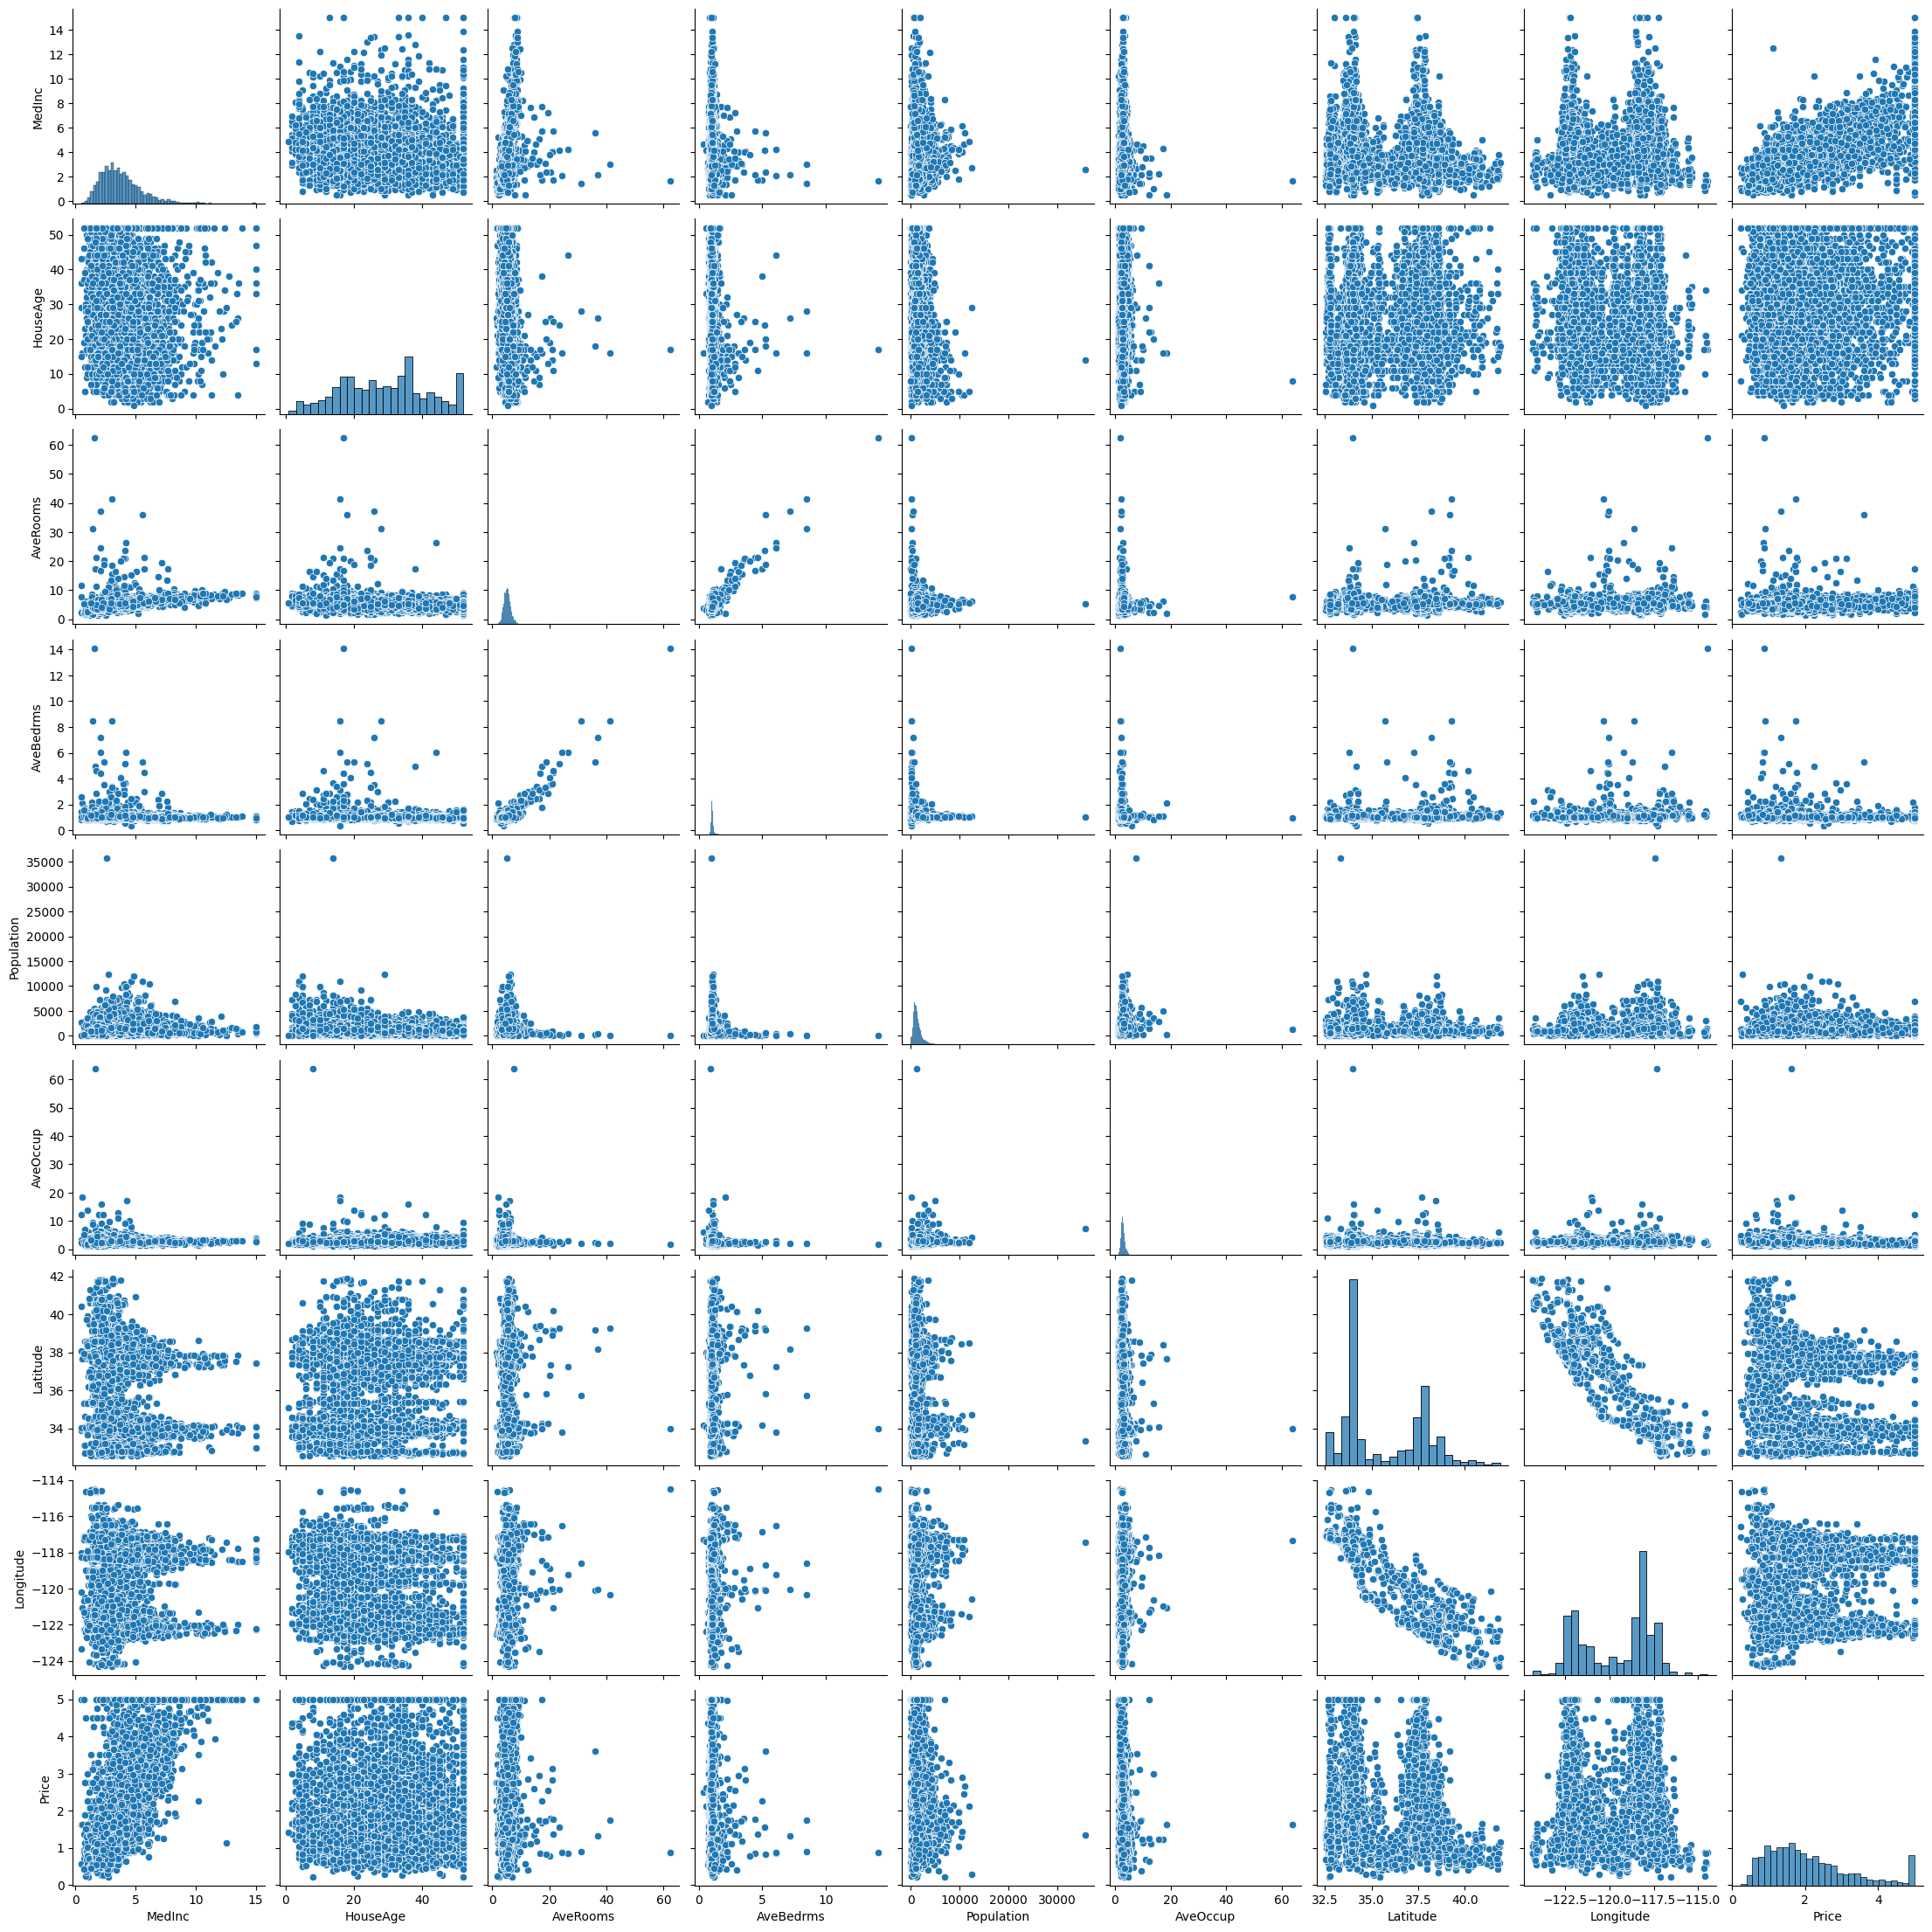

In [12]:
sns.pairplot(df_copy)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
linear = LinearRegression()

In [21]:
linear.fit(X_train, y_train)

LinearRegression()

In [22]:
linear.score(X_test, y_test)

0.591966608055959

In [24]:
def adj_r2(X,y):
  n = X_train.shape[0]
  p = X_train.shape[1]
  r2 = linear.score(X,y)
  adjusted_r2 = 1 - (((1-r2) * (n-p)) / (n-p-1))
  return adjusted_r2

adj_r2(X_test, y_test)

0.5919370810719555

In [25]:
linear.coef_

array([ 0.83814323,  0.1114302 , -0.28453407,  0.29902585, -0.00320631,
       -0.03605733, -0.8973601 , -0.86597032])

In [26]:
linear.intercept_

2.073938189181369

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

In [30]:
ridgecv = RidgeCV()

In [31]:
ridgecv.fit(X_train, y_train)

RidgeCV()

In [33]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [34]:
for i in ridgecv.alphas:
  ridge = Ridge(alpha=i)
  ridge.fit(X_train, y_train)
  print(f"The ridge score for alpha {i} is {ridge.score(X_test, y_test)}")

The ridge score for alpha 0.1 is 0.5919671059402545
The ridge score for alpha 1.0 is 0.5919715061723501
The ridge score for alpha 10.0 is 0.5920076756202544


In [35]:
lassocv = LassoCV()

lassocv.fit(X_train, y_train)

LassoCV()

In [37]:
lassocv.alphas

In [39]:

lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(f"The ridge score for alpha {i} is {lasso.score(X_test, y_test)}")

The ridge score for alpha 10.0 is 0.5614176362465971


In [49]:
elasticCV = ElasticNetCV()

elasticCV.fit(X_train, y_train)

ElasticNetCV()

In [51]:
elasticCV.alpha_

0.06423119607136933

In [52]:
elastic = ElasticNet(alpha=elasticCV.alpha_, max_iter=2000000)

elastic.fit(X_train, y_train)

ElasticNet(alpha=0.06423119607136933, max_iter=2000000)

In [53]:
elastic.score(X_test, y_test)

0.5577904126285316